<center><h1>TRA website analysis</h1></center>  
<right></right>

<h3 align="center"> Lauren Lo </h3>

<hr>
<br>

## Table of Contents <br><br>


<ul>
<li><a href="#intro">Introduction</a></li><br><br>
<li><a href="#A">A. Analyzing article data </a></li><br>
   
<ul><li><a href="#A1">Gathering Data - HTML </a></li><br>   
    <li><a href="#A2">Gathering data - Ajax </a></li><br>
    <li><a href="#A3">Exploratory Data Analysis</a></li><br>
    <li><a href="#A4">WordCloud - Title</a></li><br></ul><br>
    
<li><a href="#B">B. Analyzing content</a></li><br><br>

   <ul><li><a href="#B1">WordCloud - content</a></li><br>
   <li><a href="#B2">WordCloud - tag</a></li></ul><br>
</ul>

<a id='intro'></a> 
# Introduction


>After seeing the internship recruitment information online, I checked the TRA website and found that what you are doing is very interesting to me. So, I decided to do some research to learn more about TRA. I planed to collect data of articles in Knowledge Hub and perform some analysis.

## A. Analyzing article data

Part A Collects information on each article in Knowledge Hub, including article titles, links, contributors, and tags and performs EDA, WordCloud.
    
* 1. Collect data from the HTML of the page source
       
* 2. Collect the rest data from Ajax

* 3. Exploratory Data Analysis

* 4. WordCloud


## B. Analyzing content

Part B Collects content of each article.

* 1. Collect all content

* 2. WorldCloud

<hr>

<a id='A'></a> 
# A. Analyzing article data

### Import libraries

In [6]:
import numpy as np 
import pandas as pd 
import requests
import urllib
import re
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='A1'></a> 
## Gathering Data - HTML

In [7]:
#specify the url
url = "https://mainframe.tra.co.nz/knowledge-hub#"

#Query the website and return the html to the variable 'page'
page = requests.get(url)

#Use BeautifulSoup to get the html
html = page.text
soup = BeautifulSoup(html, 'html.parser')

#Let's see the html
soup.prettify()

'<!DOCTYPE html>\n<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n <head>\n  <!-- Global site tag (gtag.js) - Google Analytics -->\n  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-119135068-1">\n  </script>\n  <script>\n   window.dataLayer = window.dataLayer || [];\n\t  function gtag(){dataLayer.push(arguments);}\n\t  gtag(\'js\', new Date());\n\n\t  gtag(\'config\', \'UA-119135068-1\');\n  </script>\n  <meta charset="utf-8"/>\n  <meta content="Articles | Knowledge Centre | Mainframe" name="title"/>\n  <link href="https://mainframe.tra.co.nz/knowledge-hub" rel="canonical"/>\n  <meta content="Drupal 8 (https://www.dru

### Extract data

#### Extract article links

In [8]:
address_h=[]
find = soup.find_all('a', class_='section-view--sub-section__teaser')
for item in find:
    address_h.append(item.get('href'))
address_h

['/knowledge-hub/fine-art-practicing-what-you-preach',
 '/knowledge-hub/creating-meaning-data',
 '/knowledge-hub/re-imagining-advertising-playbook',
 '/knowledge-hub/customer-obsession-and-keys-growth',
 '/knowledge-hub/cultural-lens-behaviour-change',
 '/knowledge-hub/inside-minds-kiwi-organisations',
 '/knowledge-hub/curated-data-and-business-insights',
 '/knowledge-hub/our-three-big-data-commandments',
 '/knowledge-hub/fine-art-influencing-customer-centricity',
 '/knowledge-hub/understanding-behaviour-data-analytics',
 '/knowledge-hub/power-distinctive-assets',
 '/knowledge-hub/creating-purpose-driven-growth-inside-out']

#### Check the number of links we extracted

In [9]:
len(address_h)

12

#### Extract article titles

In [10]:
title_h=[]
find = soup.find_all('div',class_='section-view--sub-section__teaser-copy-container')
for item in find:
    title_h.append(item.find('h3').get_text())
title_h

['The fine art of practicing what you preach',
 'Creating meaning from data',
 'Re-imagining the advertising playbook',
 'Customer obsession and the keys to growth',
 'A cultural lens on behaviour change',
 'Inside the minds of Kiwi organisations ',
 'Curated data and the business of insights',
 'Our three big data commandments',
 'The fine art of influencing customer-centricity',
 'Understanding behaviour with data analytics',
 'The power of distinctive assets',
 'Creating purpose driven growth from the inside out']

#### Check the number of titles we extracted

In [11]:
len(title_h)

12

#### Extract article tags

In [12]:
tag_h=[]
find = soup.find_all('div',class_='section-view--sub-section__teaser-tag')

for item in find:
    tag_h.append(item.text)
    
tag_h

['In', 'Da', 'Co', 'In', 'Hb', 'In', 'Da', 'Da', 'Cc', 'Da', 'Co', 'In']

#### Check the number of titles we extracted

In [13]:
len(tag_h)

12

#### Extract article contributors

In [14]:
contributor_h=[]
find = soup.find_all('p',class_='contributor')
for item in find:
    contributor_h.append(item.text)
    
contributor_h = [c.replace('Contributor', '') for c in contributor_h]
contributor_h

['Andrew Lewis',
 'Colleen Ryan',
 'Andrew Lewis',
 'Terri Hall',
 'Colleen Ryan',
 'Colleen Ryan',
 'Tony Lai',
 'Andrew Lewis',
 'Andrew Lewis',
 'Antony Ede',
 'Colleen Ryan',
 'Shaun Fitzgibbon']

#### Check the number of titles we extracted

In [15]:
len(contributor_h)

12

<a id='A2'></a> 
## Gathering data -Ajax

In [23]:
#all_page will store all data
all_page=[]

#Info  is a list containing data for each iteration
info = []


def get_data(url):
    url = 'https://mainframe.tra.co.nz/views/ajax?_wrapper_format=drupal_ajax'
    page_list = 1
    
    while True:
        
        data = {
                    'view_name': 'articles',
                    'view_display_id': 'page_1',
                    'view_args': '',
                    'view_path': '/knowledge-hub',
                    'view_base_path': 'knowledge-hub',
                    'view_dom_id':'063ec741f57580002bae0301fff9613b7fb89b8372406337675b8d0a74e3b12e',
                    'pager_element':'0',
                    'page':page_list,
                    '_drupal_ajax':'1',
                    'ajax_page_state[theme]':'mainframe',
                    'ajax_page_state[theme_token]':'',
                    'ajax_page_state[libraries]':'addtoany/addtoany,ajax_loader/ajax_loader.throbber,core/html5shiv,mainframe/global-styling,paragraphs/drupal.paragraphs.unpublished,system/base,video_embed_field/responsive-video,views/views.module,views_infinite_scroll/views-infinite-scroll'
        
}       
        headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36',
                    #'cookie':'_ga=GA1.3.309264941.1575605903; _jsuid=577263387; SL_GWPT_Show_Hide_tmp=1; SL_wptGlobTipTmp=1; _gid=GA1.3.1820775967.1575837287; _gat_gtag_UA_119135068_1=1; _first_pageview=1; heatmaps_g2g_101116807=yes',
                   'referer':'https://mainframe.tra.co.nz/knowledge-hub'}
    
        response = requests.post(url=url,data=data,headers=headers)

        python_str = json.loads(response.text)
# Data in Page 2 located in different place     
        if page_list == 2:
            info = python_str[3]['data']
        else:
            info = python_str[1]['data']
            
# Store results via append method                     
        all_page.append(info)
            
        page_list =page_list+1
     
       
        if page_list >=7:
    
            break
       
    return all_page;
get_data(url)

['<div class="js-view-dom-id-063ec741f57580002bae0301fff9613b7fb89b8372406337675b8d0a74e3b12e section-view--sub-section">\n  \n  \n  \n\n  \n  \n  \n\n  <div data-drupal-views-infinite-scroll-content-wrapper class="views-infinite-scroll-content-wrapper clearfix">        <a href="/knowledge-hub/aucklands-transport-love-affair" class="section-view--sub-section__teaser">\n    <img src="/sites/default/files/styles/grid_1_4/public/2018-04/ruslan-bardash-354411-unsplash.jpg?h=9dd951d5" class="section-view--sub-section__teaser-image active">\n    \n    <div class="section-view--sub-section__teaser-copy">\n        <div class="section-view--sub-section__teaser-copy-container">\n            <h3>Auckland’s transport love affair</h3>\n            <h4>  \n                          \n        Separating Aucklanders from their beloved cars – easy right?\n\n\nIn a nutshell\n\nAuckland\'s rapidly growing population is placing pressure…</h4>\n        </div>\n        <p class="contributor"><span>Contribut

#### Convert list to string

In [25]:
all_string =" ".join(all_page)
all_string

'<div class="js-view-dom-id-063ec741f57580002bae0301fff9613b7fb89b8372406337675b8d0a74e3b12e section-view--sub-section">\n  \n  \n  \n\n  \n  \n  \n\n  <div data-drupal-views-infinite-scroll-content-wrapper class="views-infinite-scroll-content-wrapper clearfix">        <a href="/knowledge-hub/aucklands-transport-love-affair" class="section-view--sub-section__teaser">\n    <img src="/sites/default/files/styles/grid_1_4/public/2018-04/ruslan-bardash-354411-unsplash.jpg?h=9dd951d5" class="section-view--sub-section__teaser-image active">\n    \n    <div class="section-view--sub-section__teaser-copy">\n        <div class="section-view--sub-section__teaser-copy-container">\n            <h3>Auckland’s transport love affair</h3>\n            <h4>  \n                          \n        Separating Aucklanders from their beloved cars – easy right?\n\n\nIn a nutshell\n\nAuckland\'s rapidly growing population is placing pressure…</h4>\n        </div>\n        <p class="contributor"><span>Contributo

In [26]:
type(all_string)

str

#### Excart titles, links, contributors and tags

In [27]:
address_a=[]
title_a=[]
tag_a=[]
contributor_a=[]


address_pattern = re.compile(r'<a href="(.*?)"')
title_pattern = re.compile(r'<h3>(.*?)</h3>')
tag_pattern = re.compile(r'<div class="section-view--sub-section__teaser-tag">(.*?)</div>')
contributor_pattern = re.compile(r'<p class="contributor"><span>Contributor</span><br />(.*?)</p>')
 
address_a = re.findall(address_pattern,all_string)
title_a = re.findall(title_pattern,all_string)
tag_a = re.findall(tag_pattern,all_string)
contributor_a = re.findall(contributor_pattern,all_string)

address_a,title_a,tag_a,contributor_a


(['/knowledge-hub/aucklands-transport-love-affair',
  '/knowledge-hub/bay-audiologys-transformation-story',
  '/knowledge-hub/finding-next-big-thing-steinlager',
  '/knowledge-hub/missing-heart-customer-centricity',
  '/knowledge-hub/designing-human-behaviour',
  '/knowledge-hub/nz-post-customer-centricity-journey',
  '/knowledge-hub/show-me-money',
  '/knowledge-hub/through-looking-glass-future-data',
  '/knowledge-hub/marrying-commerce-conscience',
  '/knowledge-hub/cost-centre-growth-driver',
  '/knowledge-hub/why-social-purpose-matters',
  '/knowledge-hub/kiwi-humour-and-how-it-influences-consumer-behaviour',
  '/knowledge-hub/understanding-mindsets-be-relevant',
  '/knowledge-hub/podcast-future-insights',
  '/knowledge-hub/fake-news-still-has-power-persuade',
  '/knowledge-hub/seeing-through-anothers-eyes',
  '/knowledge-hub/let-me-make-you-offer-you-can-refuse-does-loyalty-work',
  '/knowledge-hub/grammar-brands',
  '/knowledge-hub/solving-ultimate-wicked-problem',
  '/knowledge-

In [28]:
len(address_a),len(title_a),len(tag_a),len(contributor_a)

(63, 63, 63, 63)

#### Combining two lists of links extracted from HTML and Ajax

In [29]:
address = address_h+address_a

In [30]:
address

['/knowledge-hub/fine-art-practicing-what-you-preach',
 '/knowledge-hub/creating-meaning-data',
 '/knowledge-hub/re-imagining-advertising-playbook',
 '/knowledge-hub/customer-obsession-and-keys-growth',
 '/knowledge-hub/cultural-lens-behaviour-change',
 '/knowledge-hub/inside-minds-kiwi-organisations',
 '/knowledge-hub/curated-data-and-business-insights',
 '/knowledge-hub/our-three-big-data-commandments',
 '/knowledge-hub/fine-art-influencing-customer-centricity',
 '/knowledge-hub/understanding-behaviour-data-analytics',
 '/knowledge-hub/power-distinctive-assets',
 '/knowledge-hub/creating-purpose-driven-growth-inside-out',
 '/knowledge-hub/aucklands-transport-love-affair',
 '/knowledge-hub/bay-audiologys-transformation-story',
 '/knowledge-hub/finding-next-big-thing-steinlager',
 '/knowledge-hub/missing-heart-customer-centricity',
 '/knowledge-hub/designing-human-behaviour',
 '/knowledge-hub/nz-post-customer-centricity-journey',
 '/knowledge-hub/show-me-money',
 '/knowledge-hub/throug

#### Check the number of links after combining

In [31]:
len(address)

75

#### Combining two lists of titles extracted from HTML and Ajax

In [32]:
title = title_h+title_a
title

['The fine art of practicing what you preach',
 'Creating meaning from data',
 'Re-imagining the advertising playbook',
 'Customer obsession and the keys to growth',
 'A cultural lens on behaviour change',
 'Inside the minds of Kiwi organisations ',
 'Curated data and the business of insights',
 'Our three big data commandments',
 'The fine art of influencing customer-centricity',
 'Understanding behaviour with data analytics',
 'The power of distinctive assets',
 'Creating purpose driven growth from the inside out',
 'Auckland’s transport love affair',
 'Bay Audiology&#039;s transformation story',
 'Finding the next big thing for Steinlager ',
 'The missing heart of customer-centricity',
 'Designing human behaviour',
 'NZ Post on a customer centricity journey',
 'Show me the money',
 'Through the looking glass: the future of data',
 'Marrying commerce with conscience',
 'From cost centre to growth driver',
 'Why social purpose matters',
 'Kiwi humour and how it influences consumer beh

#### Check the number of titles after combining

In [33]:
len(title)

75

#### Combining two lists of tags extracted from HTML and Ajax

In [34]:
tag = tag_h+tag_a
print(tag)

['In', 'Da', 'Co', 'In', 'Hb', 'In', 'Da', 'Da', 'Cc', 'Da', 'Co', 'In', 'Hb', 'Br', 'Cc', 'Cc', 'Hb', 'Cc', 'Cc', 'Da', 'In', 'In', 'In', 'Hb', 'Cc', 'In', 'Hb', 'Cc', 'Hb', 'Br', 'In', 'In', 'Br', 'In', 'In', 'Da', 'Cc', 'Da', 'Hb', 'Cc', 'Da', 'Da', 'Br', 'Da', 'Br', 'Br', 'Da', 'Da', 'Da', 'Br', 'Co', 'Cc', 'Br', 'Hb', 'Hb', 'Br', 'Hb', 'Hb', 'Hb', 'Co', 'Hb', 'Br', 'Co', 'Cc', 'Br', 'Hb', 'Hb', 'Cc', 'Cc', 'Cc', 'Cc', 'Cc', 'Cc', 'Br', 'Br']


#### Check the number of tags after combining

In [35]:
len(tag)

75

#### Combining two lists of contributors extracted from HTML and Ajax

In [36]:
contributor = contributor_h+contributor_a
print(contributor)

['Andrew Lewis', 'Colleen Ryan', 'Andrew Lewis', 'Terri Hall', 'Colleen Ryan', 'Colleen Ryan', 'Tony Lai', 'Andrew Lewis', 'Andrew Lewis', 'Antony Ede', 'Colleen Ryan', 'Shaun Fitzgibbon', 'Shaun Fitzgibbon', 'Colleen Ryan', 'Amber Coulter', 'Colleen Ryan', 'Colleen Ryan', 'Colleen Ryan', 'Connon Bray', 'Jonny Almario', 'Amber Coulter', 'Connon Bray', 'Andrew Lewis', 'Carl Sarney', 'Carl Sarney', 'Colleen Ryan', 'Colleen Ryan', 'Amber Coulter', 'Andrew Lewis', 'Colleen Ryan', 'Karin Glucina', 'Amber Coulter', 'Tim Gregory', 'Colleen Ryan', 'Connon Bray', 'Shaun Fitzgibbon', 'Colleen Ryan', 'Colleen Ryan', 'Colleen Ryan', 'Antonia Mann', 'Claire Tutill', 'Andrew Lewis', 'Colleen Ryan', 'Antony Ede', 'Connon Bray', 'Colleen Ryan', 'Karin Glucina', 'Colleen Ryan', 'Shaun Fitzgibbon', 'Greg Sampson', 'Amber Coulter', 'Connon Bray', 'Colleen Ryan', 'Colleen Ryan', 'Andrew Lewis', 'Andrew Lewis', 'Andrew Lewis', 'Andrew Lewis', 'Andrew Lewis', 'Andrew Lewis', 'Andrew Lewis', 'Andrew Lewis', 

#### Check the number of contributors after combining

In [37]:
len(contributor)

75

####  Cleaning 

In [38]:
title = [t.replace('&#039;','\'') for t in title]
title

['The fine art of practicing what you preach',
 'Creating meaning from data',
 'Re-imagining the advertising playbook',
 'Customer obsession and the keys to growth',
 'A cultural lens on behaviour change',
 'Inside the minds of Kiwi organisations ',
 'Curated data and the business of insights',
 'Our three big data commandments',
 'The fine art of influencing customer-centricity',
 'Understanding behaviour with data analytics',
 'The power of distinctive assets',
 'Creating purpose driven growth from the inside out',
 'Auckland’s transport love affair',
 "Bay Audiology's transformation story",
 'Finding the next big thing for Steinlager ',
 'The missing heart of customer-centricity',
 'Designing human behaviour',
 'NZ Post on a customer centricity journey',
 'Show me the money',
 'Through the looking glass: the future of data',
 'Marrying commerce with conscience',
 'From cost centre to growth driver',
 'Why social purpose matters',
 'Kiwi humour and how it influences consumer behaviou

#### Merging into one dataframe

In [39]:
c={"title":title,
   "address" :address,
   "tag":tag,
   "contributor":contributor}
df=pd.DataFrame(c)
df.head()

title  \
0  The fine art of practicing what you preach   
1                  Creating meaning from data   
2       Re-imagining the advertising playbook   
3   Customer obsession and the keys to growth   
4         A cultural lens on behaviour change   

                                             address tag   contributor  
0  /knowledge-hub/fine-art-practicing-what-you-pr...  In  Andrew Lewis  
1               /knowledge-hub/creating-meaning-data  Da  Colleen Ryan  
2   /knowledge-hub/re-imagining-advertising-playbook  Co  Andrew Lewis  
3  /knowledge-hub/customer-obsession-and-keys-growth  In    Terri Hall  
4      /knowledge-hub/cultural-lens-behaviour-change  Hb  Colleen Ryan

In [40]:
df.tail()

title  \
70                         Breaking down silos   
71  Being human-centric in the technology hype   
72       Less ‘know me’ and more ‘bring it on’   
73                      Mercury's purpose pays   
74          When brands breach the fourth wall   

                                              address tag    contributor  
70                 /knowledge-hub/breaking-down-silos  Cc  Karin Glucina  
71  /knowledge-hub/being-human-centric-technology-...  Cc   Antonia Mann  
72      /knowledge-hub/less-know-me-and-more-bring-it  Cc   Colleen Ryan  
73               /knowledge-hub/mercurys-purpose-pays  Br  Karin Glucina  
74      /knowledge-hub/when-brands-breach-fourth-wall  Br   Colleen Ryan

<hr>

## <a id='A3'></a> Exploratory Data Analysis

In [92]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of tags in this dataset such as {}. \n".format(len(df.tag.unique()),
                                                                           ", ".join(df.tag.unique()[0:6])))

print("There are {} contributors producing articles in this dataset such as {}... \n".format(len(df.contributor.unique()),
                                                                                      ", ".join(df.contributor.unique()[0:5])))

There are 75 observations and 5 features in this dataset. 

There are 6 types of tags in this dataset such as In, Da, Co, Hb, Cc, Br. 

There are 15 contributors producing articles in this dataset such as Andrew Lewis, Colleen Ryan, Terri Hall, Tony Lai, Antony Ede... 



In [42]:
# set data
common_tag = df['tag'].value_counts()
common_tag

Cc    17
Hb    15
Da    13
Br    13
In    12
Co     5
Name: tag, dtype: int64

#### Visualizing value counts

In [43]:
#set index and values in names to X,y
X = common_tag.index
y = common_tag.values
df_tag = pd.DataFrame({"X":X, "y":y})

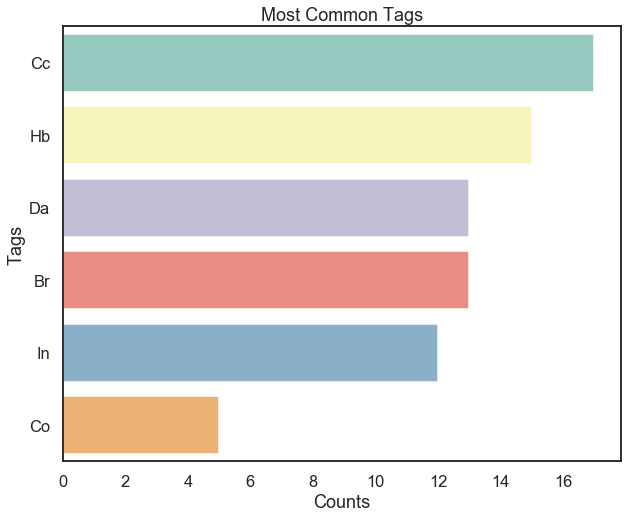

In [32]:
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes
sb.set(style='white',context="talk",)
sb.barplot("y", "X", palette="Set3", data=df_tag)
plt.xlabel("Counts")
plt.ylabel("Tags")
plt.title("Most Common Tags")
plt.show();

<br>17 articles tagged as <b>Customer centricity</b>.<br> <b>Human behaviour</b> ranked second with 15.<br>

In [44]:
# set data
common_contributor = df['contributor'].value_counts()
common_contributor

Colleen Ryan        24
Andrew Lewis        20
Connon Bray          5
Amber Coulter        5
Karin Glucina        4
Shaun Fitzgibbon     4
Antony Ede           2
Antonia Mann         2
Tim Gregory          2
Carl Sarney          2
Greg Sampson         1
Claire Tutill        1
Terri Hall           1
Jonny Almario        1
Tony Lai             1
Name: contributor, dtype: int64

In [51]:
common_contributor['Colleen Ryan']/75

0.32

<b>Colleen Ryan</b> is the most productive writer who writes 24 aritcles, accounts for around 30% of the total number.<br>
<b>Andrew Lewis</b> ranked second with 20.

#### Visualizing value counts

In [45]:
#set index and values in names to X,y
X = common_contributor.index
y = common_contributor.values
df_contributor = pd.DataFrame({"X":X, "y":y})

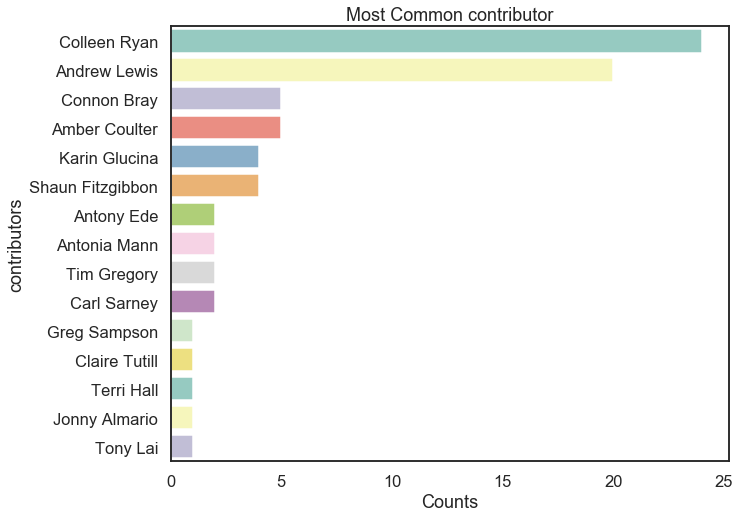

In [46]:
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes
sb.set(style='white',context="talk",)
sb.barplot("y", "X", palette="Set3", data=df_contributor)
plt.xlabel("Counts")
plt.ylabel("contributors")
plt.title("Most Common contributor")
plt.show();

<hr>

<a id='A4'></a> 
## Wordcloud - Title


 - Create and generate a wordcloud image
 - Display the cloud using matplotlib

In [54]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### Import libraries

### Creating Wordcloud of contributors

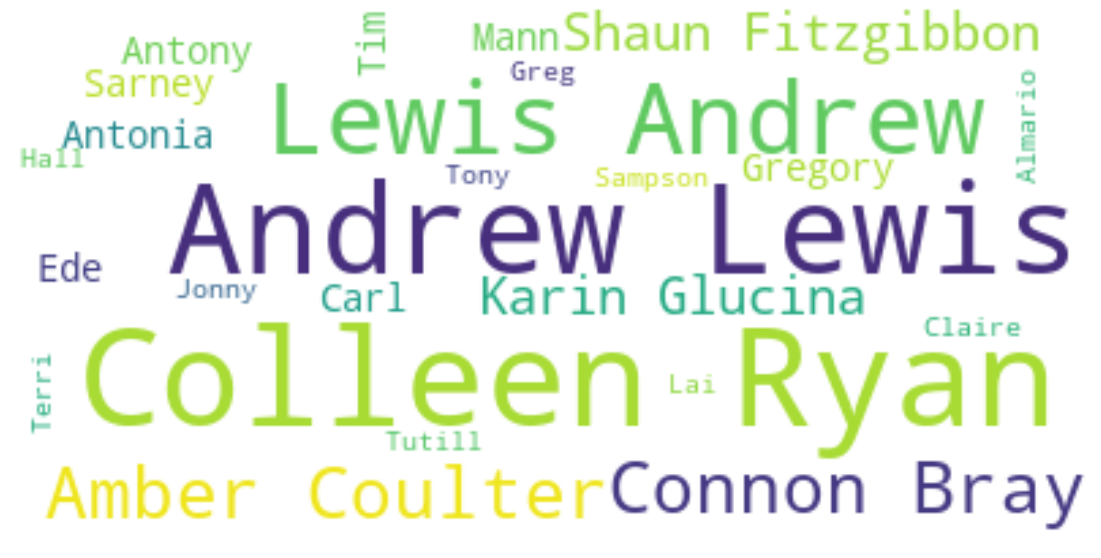

In [63]:
# Convert series into string
text= " ".join(df.contributor.astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Creating Wordcloud of titles

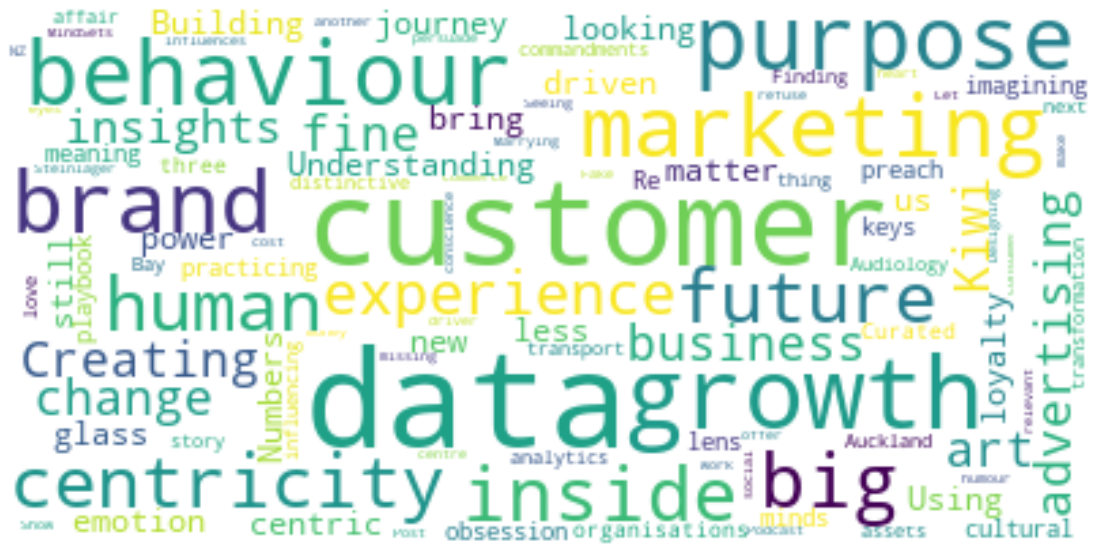

In [65]:
# Convert series into string
text= " ".join(df.title.astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that <b>customer</b>, <b>data</b>,<b>brand</b>, <b>behaviour</b> and <b>growth</b> are the keywords of these titles.

In [56]:
type(text)

str

<hr>

<a id='B'></a>

## Gatehring articles content

### Completing whole website links

In [66]:
address_list = [a.replace('/knowledge-hub/','https://mainframe.tra.co.nz/knowledge-hub/')for a in address]

In [67]:
address_list[:5]

['https://mainframe.tra.co.nz/knowledge-hub/fine-art-practicing-what-you-preach',
 'https://mainframe.tra.co.nz/knowledge-hub/creating-meaning-data',
 'https://mainframe.tra.co.nz/knowledge-hub/re-imagining-advertising-playbook',
 'https://mainframe.tra.co.nz/knowledge-hub/customer-obsession-and-keys-growth',
 'https://mainframe.tra.co.nz/knowledge-hub/cultural-lens-behaviour-change']

### Collecting content

In [68]:
content_list =[]

def get_content():
        successful_count=0
        fail_count=0
        finally_get=0
        total_page=len(address_list)

        for a in address_list:
            
#Query the website and return the html to the variable 'page'
            page = requests.get(a)
#Use BeautifulSoup to get the html
            html = page.text
#Let's see the html
            soup = BeautifulSoup(html,'html.parser')

#Let's see the html
            soup.prettify()

            find_content= soup.find('meta', attrs={'name':'twitter:description'})

            if find_content != None:
                
                    content = find_content['content']
                    content_list.append(content)
                    successful_count+=1

            else :
                
                    print( "Fail:index:{}\n{}".format(address_list.index(a),a))
                    fail_count +=1
                
                
                    find_video_summary = soup.find('div', attrs={'class': 'article__video-summary field__item'})
                    content = find_video_summary.text
                    content_list.append(content)
                    print('finally get:\n{}'.format(a))
                    finally_get +=1
                
        print('successfully get {} pages'.format(successful_count))
        print('fail to get {} pages'.format(fail_count))
        print('finally get {} pages'.format(finally_get))
        
        print('Number of pages need to get:{}'.format(total_page-successful_count-finally_get))
            
            
        return content_list
get_content()  

Fail:index:9
https://mainframe.tra.co.nz/knowledge-hub/understanding-behaviour-data-analytics
finally get:
https://mainframe.tra.co.nz/knowledge-hub/understanding-behaviour-data-analytics
Fail:index:50
https://mainframe.tra.co.nz/knowledge-hub/using-emotion-build-effective-comms
finally get:
https://mainframe.tra.co.nz/knowledge-hub/using-emotion-build-effective-comms
Fail:index:51
https://mainframe.tra.co.nz/knowledge-hub/delivering-customer-experience
finally get:
https://mainframe.tra.co.nz/knowledge-hub/delivering-customer-experience
Fail:index:52
https://mainframe.tra.co.nz/knowledge-hub/building-mental-picture-brand
finally get:
https://mainframe.tra.co.nz/knowledge-hub/building-mental-picture-brand
Fail:index:53
https://mainframe.tra.co.nz/knowledge-hub/four-levels-consciousness
finally get:
https://mainframe.tra.co.nz/knowledge-hub/four-levels-consciousness
successfully get 70 pages
fail to get 5 pages
finally get 5 pages
Number of pages need to get:0


['Creating a business with a stated mission to uncover growth for organisations through the adoption of a human-centric mindset is a bold idea to embrace as a central organising thought.\n\n\nIn a nutshell\n\nTRA has developed a set of central tenants\xa0as to how insight into people can be applied to business strategy and tactics to drive growth.\n\tFirstly, curated data provides necessary foresight which acts as a starting point for our thinking.\n\tSecondly, ideas need to be developed in collaboration with real people to provide guidance on execution.\n\tThirdly, applying science provides the rigour we need for successful creative thought.\n\n\nGrowth is the promised land, and it’s a big game to talk that you’ve got the keys to the kingdom. But that’s what we have set out to do with TRA. From the outset our entire focus has been on understanding how insight into human behaviour can power organisational growth. How placing people at the heart of decision-making can create better outc

### Cleaning text

In [70]:
content_list = [c.replace('\xa0',' ') for c in content_list]

In [71]:
content_list = [c.replace('\n',' ') for c in content_list]

In [72]:
content_list = [c.replace('\t','') for c in content_list]

In [73]:
content_list = [c.replace('\\','') for c in content_list]

In [74]:
content_list = [c.strip('\\') for c in content_list]

In [75]:
print(content_list)

['Creating a business with a stated mission to uncover growth for organisations through the adoption of a human-centric mindset is a bold idea to embrace as a central organising thought.   In a nutshell  TRA has developed a set of central tenants as to how insight into people can be applied to business strategy and tactics to drive growth. Firstly, curated data provides necessary foresight which acts as a starting point for our thinking. Secondly, ideas need to be developed in collaboration with real people to provide guidance on execution. Thirdly, applying science provides the rigour we need for successful creative thought.   Growth is the promised land, and it’s a big game to talk that you’ve got the keys to the kingdom. But that’s what we have set out to do with TRA. From the outset our entire focus has been on understanding how insight into human behaviour can power organisational growth. How placing people at the heart of decision-making can create better outcomes for everyone – 

### Convert the list into 'content' column in df

In [77]:
df['content']=content_list

In [244]:
df.tail()

title  \
70                         Breaking down silos   
71  Being human-centric in the technology hype   
72       Less ‘know me’ and more ‘bring it on’   
73                      Mercury's purpose pays   
74          When brands breach the fourth wall   

                                              address tag    contributor  \
70                 /knowledge-hub/breaking-down-silos  Cc  Karin Glucina   
71  /knowledge-hub/being-human-centric-technology-...  Cc   Antonia Mann   
72      /knowledge-hub/less-know-me-and-more-bring-it  Cc   Colleen Ryan   
73               /knowledge-hub/mercurys-purpose-pays  Br  Karin Glucina   
74      /knowledge-hub/when-brands-breach-fourth-wall  Br   Colleen Ryan   

                                              content  
70  The word silo has more than one meaning.   In ...  
71  AI, machine learning, wearables and VR hold ex...  
72  I recently had one of the most enjoyable resta...  
73  There's been talk recently of short-termism ac...  
74  There is a new set of rules when brands breach...

<hr>

<a id='B2'></a>
## Wordcloud - All Content

### Convert series into string

In [213]:
all_content=[]
all_content=" ".join(str(a) for a in content_list)

In [214]:
all_content

'Creating a business with a stated mission to uncover growth for organisations through the adoption of a human-centric mindset is a bold idea to embrace as a central organising thought.   In a nutshell  TRA has developed a set of central tenants as to how insight into people can be applied to business strategy and tactics to drive growth. Firstly, curated data provides necessary foresight which acts as a starting point for our thinking. Secondly, ideas need to be developed in collaboration with real people to provide guidance on execution. Thirdly, applying science provides the rigour we need for successful creative thought.   Growth is the promised land, and it’s a big game to talk that you’ve got the keys to the kingdom. But that’s what we have set out to do with TRA. From the outset our entire focus has been on understanding how insight into human behaviour can power organisational growth. How placing people at the heart of decision-making can create better outcomes for everyone – p

In [215]:
type(all_content)

str

In [216]:
len(all_content)

372835

### Creating Wordcloud of content

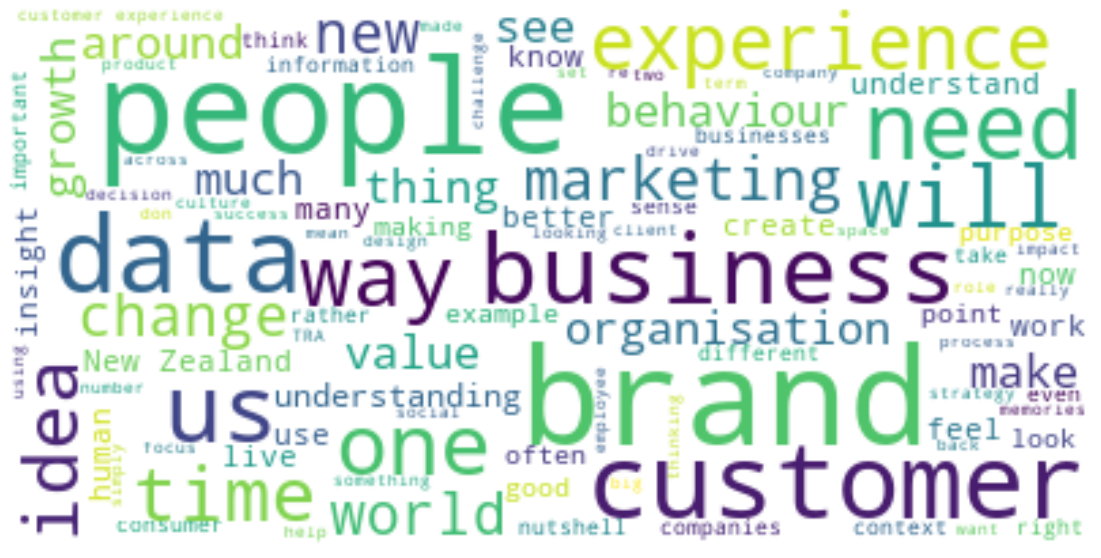

In [199]:
# Create and generate a word cloud image:
wordcloud_c = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_content)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_c, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that <b>brand</b>, <b>people</b>, <b>data</b>, <b>customer</b> and <b>business</b> are keywords in the content.

<a id='B2'></a>
## WrodCloud by tags

#### Grouping content by tags

In [140]:
df['content'] = df['content'].fillna('').astype(str)
df_grouped = df.groupby('tag')['content'].sum()
print(df_grouped)

tag
Br    Bay Audiology won twice at the 2017 TVNZ NZ Ma...
Cc    Customer-centricity has been the dominant busi...
Co    As a species, we are not good at change.   In ...
Da    Think how much better the soothsayers would ha...
Hb    The cultural environment for behaviour change....
In    Creating a business with a stated mission to u...
Name: content, dtype: object


#### Convert series into list

In [234]:
list_grouped = df_grouped.tolist()
len(list_grouped)

6

In [156]:
list_tag = df_grouped.index.tolist()
len(list_tag)

6

In [157]:
list_tag

['Br', 'Cc', 'Co', 'Da', 'Hb', 'In']

#### Assigning each content in the list to accordingly tag

In [224]:
Br=df_grouped[0]
Cc=df_grouped[1]
Co=df_grouped[2]
Da=df_grouped[3]
Hb=df_grouped[4]
In=df_grouped[5]

### Brand (Br)

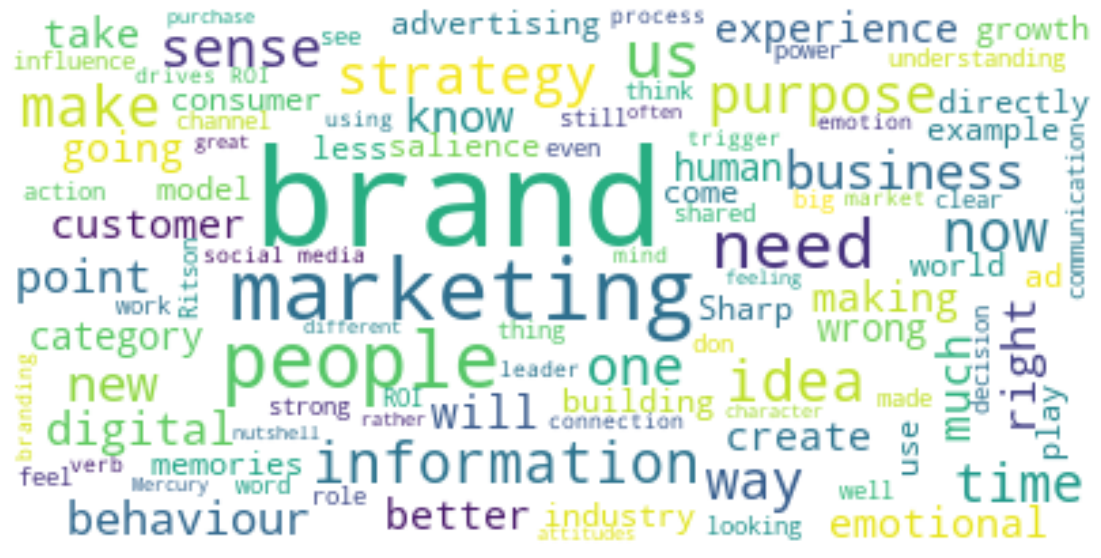

In [226]:
# Create and generate a word cloud image:
Br = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Br)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(Br, interpolation='bilinear')
plt.axis("off")
plt.show()

### Customer Centricity (Cc)

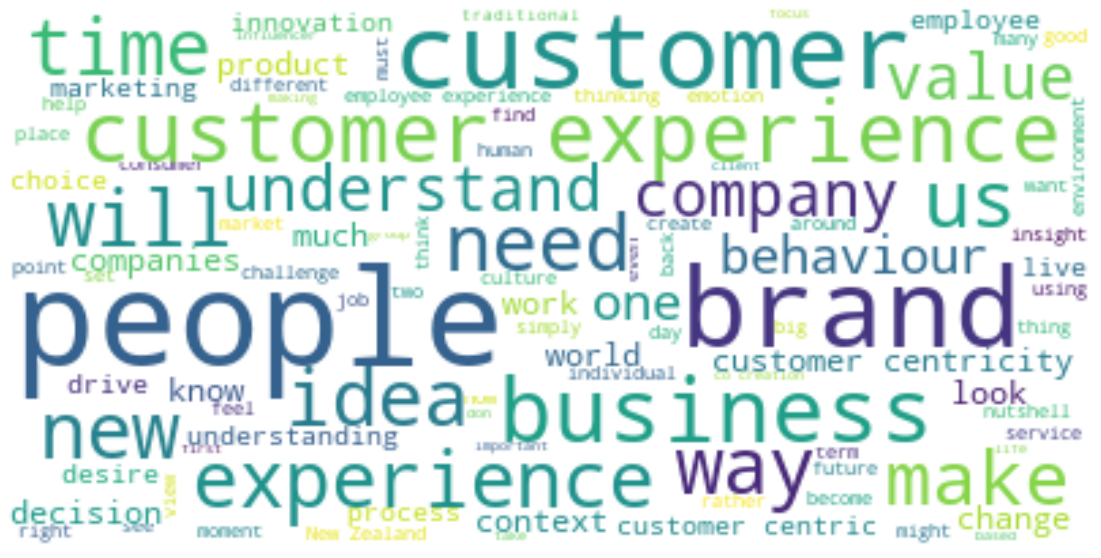

In [227]:
# Create and generate a word cloud image:
Cc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Cc)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(Cc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Communications (Co)

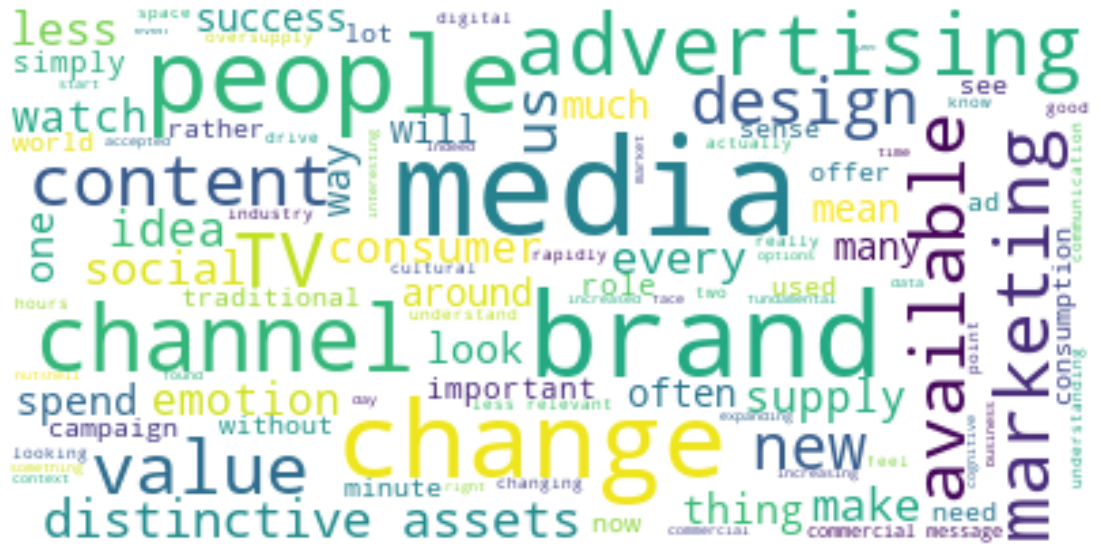

In [228]:
# Create and generate a word cloud image:
Co = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Co)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(Co, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data (Da)

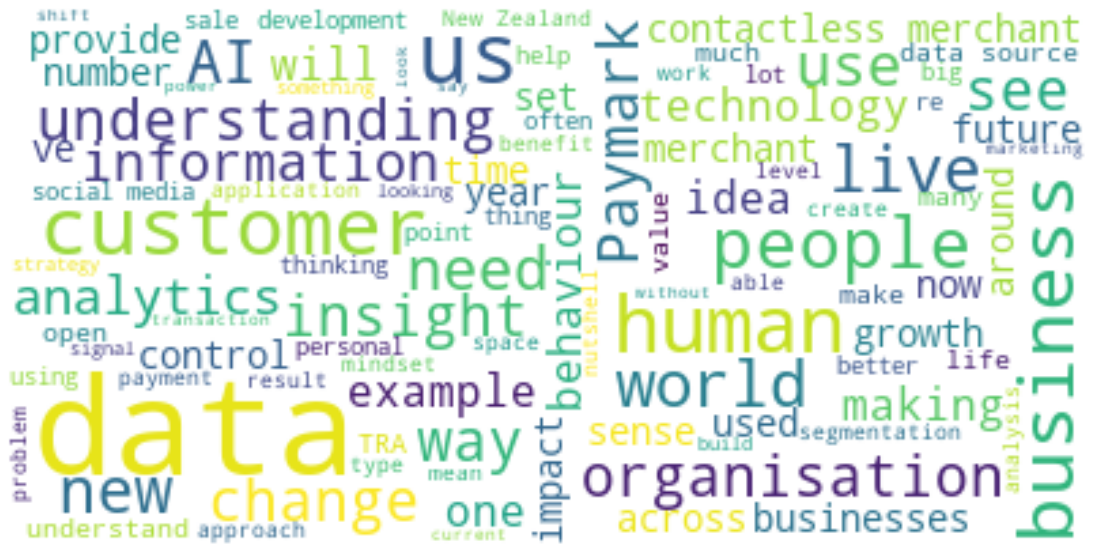

In [229]:
# Create and generate a word cloud image:
Da = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Da)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(Da, interpolation='bilinear')
plt.axis("off")
plt.show()

### Human behaviour (Hb)

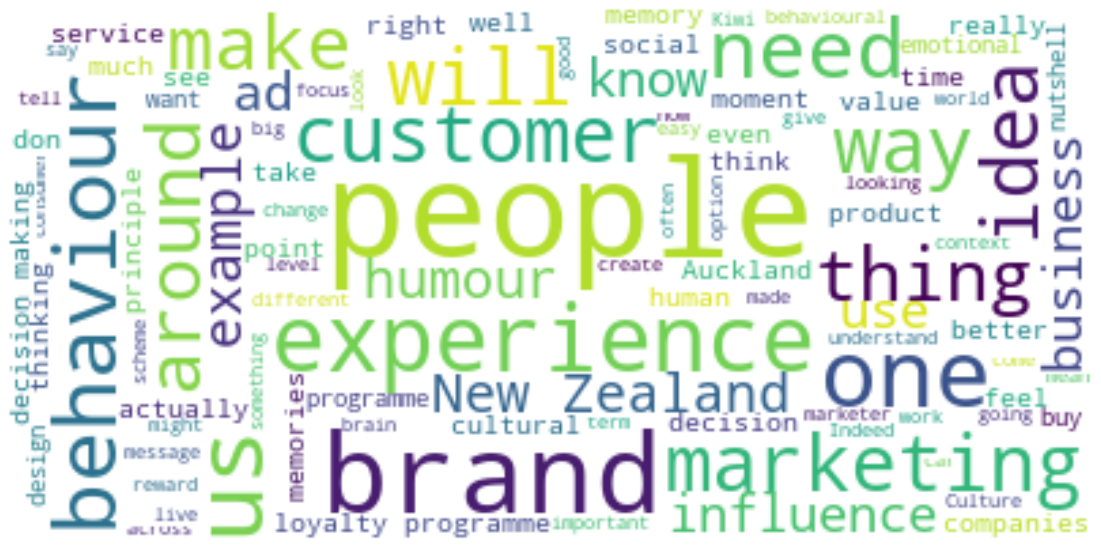

In [230]:
# Create and generate a word cloud image:
Hb = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Hb)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(Hb, interpolation='bilinear')
plt.axis("off")
plt.show()

###Innovation (In)

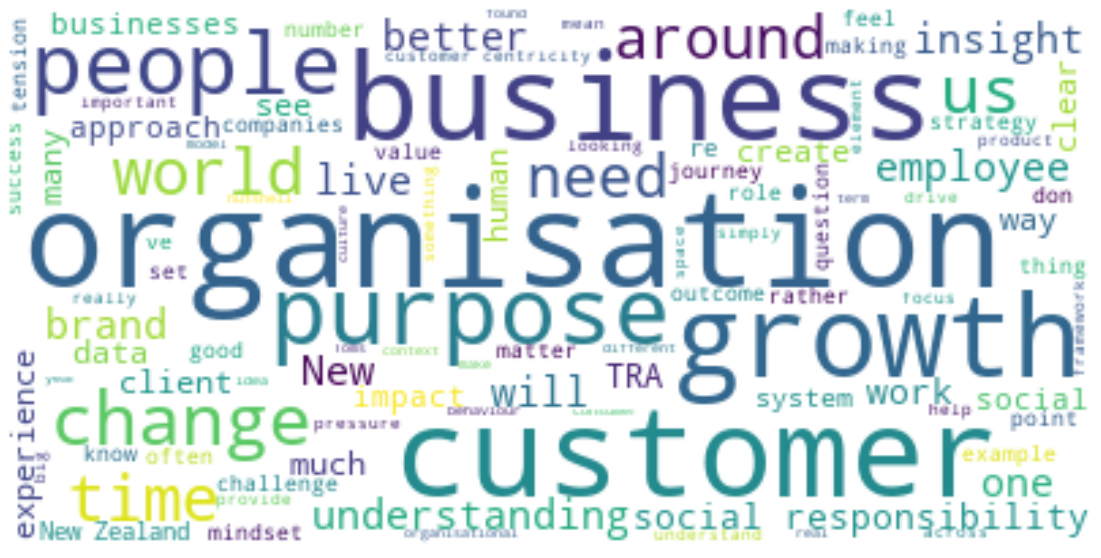

In [232]:
# Create and generate a word cloud image:
In = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(In)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(In, interpolation='bilinear')
plt.axis("off")
plt.show()

## sentiment analysis

In [240]:
from textblob import TextBlob
blob = TextBlob(all_content)
blob

TextBlob("Creating a business with a stated mission to uncover growth for organisations through the adoption of a human-centric mindset is a bold idea to embrace as a central organising thought.   In a nutshell  TRA has developed a set of central tenants as to how insight into people can be applied to business strategy and tactics to drive growth. Firstly, curated data provides necessary foresight which acts as a starting point for our thinking. Secondly, ideas need to be developed in collaboration with real people to provide guidance on execution. Thirdly, applying science provides the rigour we need for successful creative thought.   Growth is the promised land, and it’s a big game to talk that you’ve got the keys to the kingdom. But that’s what we have set out to do with TRA. From the outset our entire focus has been on understanding how insight into human behaviour can power organisational growth. How placing people at the heart of decision-making can create better outcomes for eve

In [241]:
blob.sentences

[Sentence("Creating a business with a stated mission to uncover growth for organisations through the adoption of a human-centric mindset is a bold idea to embrace as a central organising thought."),
 Sentence("In a nutshell  TRA has developed a set of central tenants as to how insight into people can be applied to business strategy and tactics to drive growth."),
 Sentence("Firstly, curated data provides necessary foresight which acts as a starting point for our thinking."),
 Sentence("Secondly, ideas need to be developed in collaboration with real people to provide guidance on execution."),
 Sentence("Thirdly, applying science provides the rigour we need for successful creative thought."),
 Sentence("Growth is the promised land, and it’s a big game to talk that you’ve got the keys to the kingdom."),
 Sentence("But that’s what we have set out to do with TRA."),
 Sentence("From the outset our entire focus has been on understanding how insight into human behaviour can power organisationa

In [242]:
blob.sentiment

Sentiment(polarity=0.14659217187142082, subjectivity=0.4644170152534375)

 - 1. polarity: negative vs. positive    (-1.0 => +1.0)
 - 2. subjectivity: objective vs. subjective (+0.0 => +1.0)

The Polarity indicates the sentiment, minus is for negative, 0 is for neutral and positive is for positive statement. 

The subjectivity value can be between 0 and 1. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

We can see that polarity is about 0.1, which means that the statement is quite netural and 0.5 subjectivity refers that it is fairly subjective.